In [75]:
import pandas as pd

In [76]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_id = test["PassengerId"]

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [79]:
data.shape

(891, 12)

In [80]:
data.drop(["Name","Ticket","Cabin","PassengerId"], axis=1, inplace = True)
test.drop(["Name","Ticket","Cabin","PassengerId"], axis=1, inplace = True)

In [81]:
data["Embarked"].fillna(data["Embarked"].mode() , inplace = True)
test["Embarked"].fillna(test["Embarked"].mode() , inplace = True)

<Axes: >

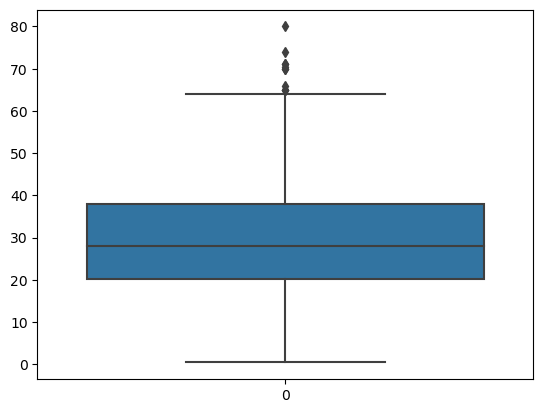

In [82]:
import seaborn as sns

sns.boxplot(data["Age"])

In [83]:
data["Age"].fillna(data["Age"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [84]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

columns = ["Sex","Embarked"]

for col in columns:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y=data["Survived"]
X=data.drop("Survived", axis=1)

X_train, X_val, y_train, y_validation = train_test_split(X, y, test_size = 0.15, random_state=42)

In [87]:
model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [88]:
predict_val = model.predict(X_val)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation,predict_val)

0.8134328358208955

In [90]:
submission = model.predict(test)

In [91]:
df = pd.DataFrame({ "PassengerId": test_id.values,
                    "Survived"   : submission,})

In [92]:
df.to_csv("submission.csv", index = False)